## Churn Prediction in Banking Sector##

### Introduction
Customer churn rate based on the behavior of bank customers is one of the important key business metrics as it can help develop business strategies to reduce the cost. This project analyzes the behavior of bank customers who are more likely to leave the bank (or close the bank account). The model will utilize exploratory data analysis and some predictive analytics techniques to identify the potential customers that are likely to churn. As the project moves forward further analysis techniques and opportunities will be explored. The project has the following objectives - 
1. Predict the chances of any customer leaving the bank.
2. Identify and analyze the major indicators of a customer churn.
3. Develop strategies that can be used to minimize the customer churn rate.
The data for this analysis is taken from publicly available Kaggle database(https://www.kaggle.com/mathchi/churn-for-bank-customers). 

### Data Import and Exploratory Analysis
####Data import and exploratory data analysis (EDA) followed importing required modules and reading data from bank churn rate csv file with desired columns that could be informative in building machine
learning model. The datasets consist of varying nature numric and categorical features. 

In [34]:
#Import required modules and data dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


### Data Exploration
I begin data wrangling by reading in dataset (csv file) into pandas and displaying the column names along with their data types. Also I look in to the first few rows of the entire dataset.

In [2]:
#Reading data into pandas DF
dataset = pd.read_csv('https://raw.github.com/neupanebinod/Capstone-Project-II/master/Capstone-Project-II/Churn_Modelling.csv')
#Checking first five rows of the dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Based on this, I can assume that CustomerId is a unique identifier, Exited is going to tell us whether the the customer churned or not churned. 

In [3]:
#Checking column information
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

We have 14 columns/features in the dataset. 

In [4]:
#Checking data types
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Gender, Geography, and Surname are categorical features whereas ther rest of all other features are numerical.

In [5]:
#Checking statistical summary of numerical values
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


The table above describes the statistical summary of the numerical variables. 

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#grouping features by data types
dataset.columns.to_series().groupby(dataset.dtypes).groups

{dtype('int64'): Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
        'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
       dtype='object'),
 dtype('float64'): Index(['Balance', 'EstimatedSalary'], dtype='object'),
 dtype('O'): Index(['Surname', 'Geography', 'Gender'], dtype='object')}

In [8]:
#Checking if any missing values are present
missing = pd.concat([dataset.isnull().sum(), 100 * dataset.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending= False)

,count,%
RowNumber,0,0.0
CustomerId,0,0.0
Surname,0,0.0
CreditScore,0,0.0
Geography,0,0.0
Gender,0,0.0
Age,0,0.0
Tenure,0,0.0
Balance,0,0.0
NumOfProducts,0,0.0


 As seen in the output above there are no missing values in the dataset. 

In [9]:
dataset.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [10]:
dataset.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

As seen in the output above there are no NA or missing values in the dataset. 

In [11]:
#Since we are interested in evaluating the churn rate, our target variable is 'Exited' 
#Check target variable information
dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

The information above highlights that the target feature has imbalanced data (about 8000 records are not-chured or 0 while churned or 1 are just about 2000). This requires upsampling or balancing the data in the data preprocessing step. 

In [12]:
#Drop columns that are not important in the analysis
dataset = dataset.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Descriptive statistics of cleaned dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [14]:
#average of each features 
dataset.groupby("Exited").agg("mean")

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [15]:
#Average age by gender
dataset.groupby("Gender").agg({"Age": "mean"})

,Age
Gender,
Female,39.238389
Male,38.658237


The average age of male and female is 38 and 39 years, respectively.

In [16]:
# Churn rate based on geography
dataset.groupby("Geography").agg({"Exited": "count"})

,Exited
Geography,
France,5014
Germany,2509
Spain,2477


In [17]:
# Number of both the churned and non-churned customers, grouped by active membership and credit card possession
dataset.groupby(["IsActiveMember", "HasCrCard"]).agg({"Exited" : "count"})

Exited
IsActiveMember HasCrCard        
0              0            1401
               1            3448
1              0            1544
               1            3607

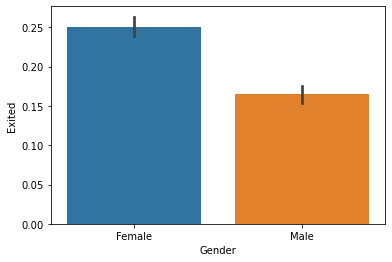

In [32]:
#Check Gender and Exit Rate
gender= sns.barplot(x = "Gender", y = "Exited", data = dataset)
#gender.set_ylabels("Churn Rate")
plt.show()

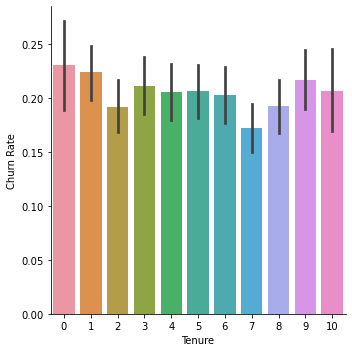

In [19]:
#Check Tenure and Exit Rate
tenure= sns.factorplot(x = "Tenure", y = "Exited", data = dataset, kind = "bar", size = 5)
tenure.set_ylabels("Churn Rate")
plt.show()

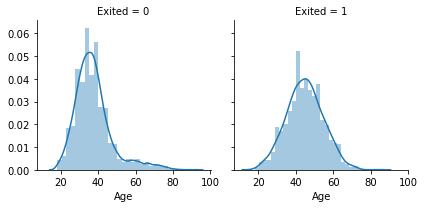

In [20]:
#Check Age and Exit Rate
age= sns.FacetGrid(dataset, col = "Exited")
age.map(sns.distplot, "Age", bins = 30)
plt.show()

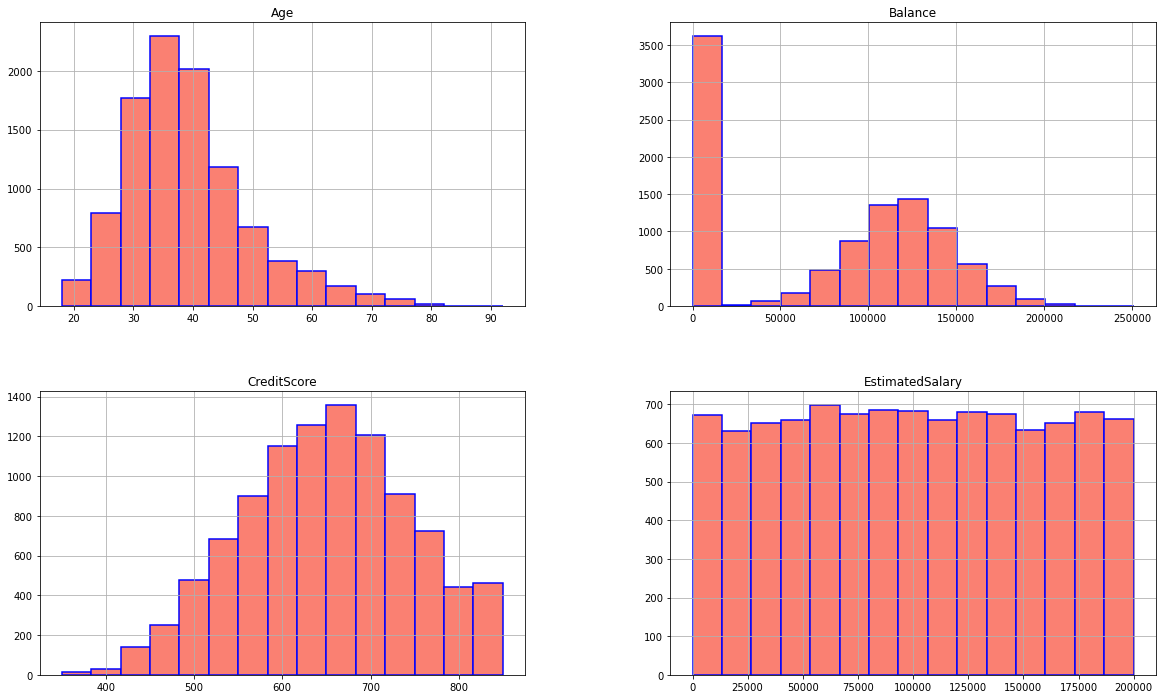

In [21]:
distribution = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
dataset[distribution].hist(figsize = (20, 12), bins = 15, layout = (2, 2), 
                          color = 'salmon', edgecolor = 'blue', linewidth = 1.5);

Distribution of selected features show that Age and CreditScore are normally distributed. Feature Balance is also normally distributed except one outlier data point. EstimatedSalary has a uniform distribution.

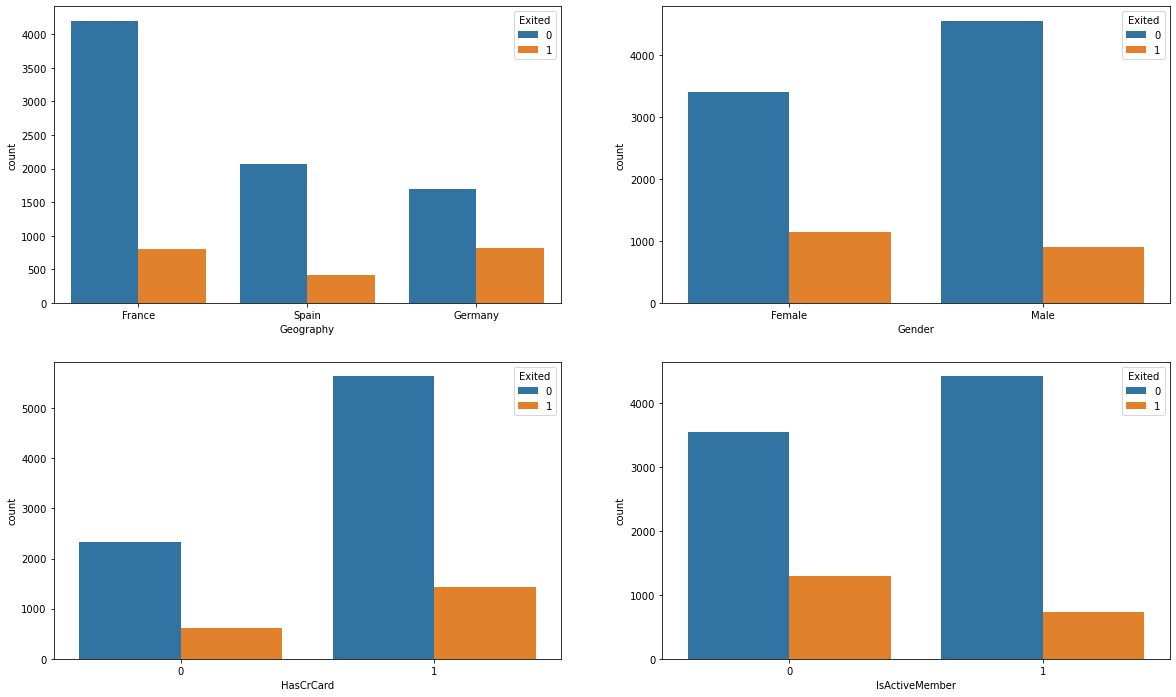

In [22]:
# Plotting categorical variables to visualize target variable.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

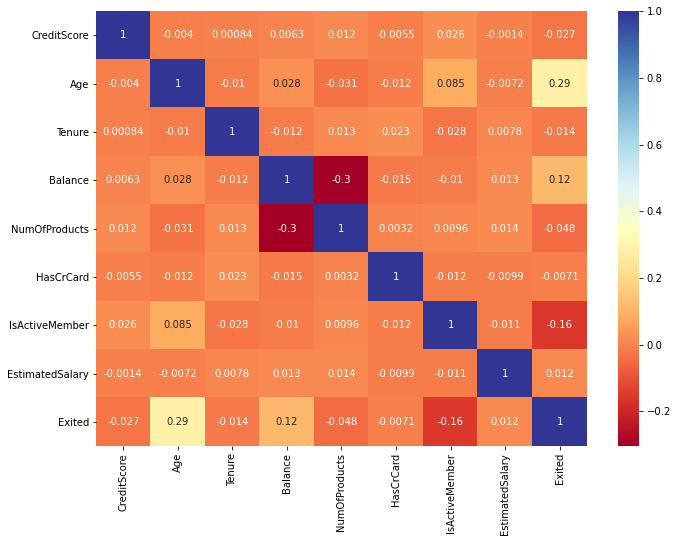

In [23]:
# calculate the correlation matrix
corr = dataset.corr()

# plot the heatmap
plt.subplots(figsize=(11,8))
sns.heatmap(corr, annot=True, cmap="RdYlBu",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Reshaping data
Data processing is a critical step after the EDA in order to prepare data for further exploration and modelling. All categorical features were dummy-coded/encoded with one-hot encoding method using get_dummies() method in pandas package to create features with one of the feature levels dropped to avoid singularity in data.

In [24]:
#Dummy coding categorical columns and dropping the first level
dataset1 = pd.get_dummies(data=dataset, columns=['Gender','Geography'], drop_first=True)
df= pd.concat([dataset, dataset1], axis=1)
df.drop(columns =['Gender', 'Geography'],axis=1, inplace=True)
df = df.loc[:,~df.columns.duplicated()]
df.head(20)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,44,8,113755.78,2,1,0,149756.71,1,1,0,1
6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [35]:
#Standarize numerical data using StandardScaler 
scaler = StandardScaler()
scl_columns = ['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts', 'EstimatedSalary']
df[scl_columns] = scaler.fit_transform(df[scl_columns])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1
